<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(_1_6)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-1.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-1.6_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,99.885564,45.536138,0.055957,155.477660,155.419404,0.058256
1,0.0,1.0,54.986176,69.140505,0.028127,134.154807,134.125956,0.028851
2,0.0,2.0,59.056284,23.366077,-0.023017,92.399344,92.418950,-0.019606
3,0.0,3.0,37.716531,58.803866,0.044807,106.565205,106.519147,0.046058
4,0.0,4.0,88.491415,75.152350,-0.039219,173.604546,173.643243,-0.038697
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,98.094957,71.631741,-0.000290,179.726408,179.737487,-0.011079
119996,999.0,116.0,84.074774,20.809049,0.082457,114.966281,114.906326,0.059954
119997,999.0,117.0,63.101472,57.848849,-0.072638,130.877683,130.953453,-0.075770
119998,999.0,118.0,95.582913,40.627650,0.142100,146.352663,146.230596,0.122067


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    99.885564  45.536138  0.055957  155.477660  155.419404  0.058256
      1.0    54.986176  69.140505  0.028127  134.154807  134.125956  0.028851
      2.0    59.056284  23.366077 -0.023017   92.399344   92.418950 -0.019606
      3.0    37.716531  58.803866  0.044807  106.565205  106.519147  0.046058
      4.0    88.491415  75.152350 -0.039219  173.604546  173.643243 -0.038697
...                ...        ...       ...         ...         ...       ...
999.0 115.0  98.094957  71.631741 -0.000290  179.726408  179.737487 -0.011079
      116.0  84.074774  20.809049  0.082457  114.966281  114.906326  0.059954
      117.0  63.101472  57.848849 -0.072638  130.877683  130.953453 -0.075770
      118.0  95.582913  40.627650  0.142100  146.352663  146.230596  0.122067
      119.0  89.238674  96.643310 -0.005326  195.876658  195.881535 -0.004877

[120000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    99.885564  45.536138  0.055957  155.477660  155.419404  0.058256
      1.0    54.986176  69.140505  0.028127  134.154807  134.125956  0.028851
      2.0    59.056284  23.366077 -0.023017   92.399344   92.418950 -0.019606
      3.0    37.716531  58.803866  0.044807  106.565205  106.519147  0.046058
      4.0    88.491415  75.152350 -0.039219  173.604546  173.643243 -0.038697
...                ...        ...       ...         ...         ...       ...
999.0 115.0  98.094957  71.631741 -0.000290  179.726408  179.737487 -0.011079
      116.0  84.074774  20.809049  0.082457  114.966281  114.906326  0.059954
      117.0  63.101472  57.848849 -0.072638  130.877683  130.953453 -0.075770
      118.0  95.582913  40.627650  0.142100  146.352663  146.230596  0.122067
      119.0  89.238674  96.643310 -0.005326  195.876658  195.881535 -0.004877

[120000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,99.885564,45.536138,0.055957,155.477660,155.419404,0.058256
1,0.0,1.0,54.986176,69.140505,0.028127,134.154807,134.125956,0.028851
2,0.0,2.0,59.056284,23.366077,-0.023017,92.399344,92.418950,-0.019606
3,0.0,3.0,37.716531,58.803866,0.044807,106.565205,106.519147,0.046058
4,0.0,4.0,88.491415,75.152350,-0.039219,173.604546,173.643243,-0.038697
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,98.094957,71.631741,-0.000290,179.726408,179.737487,-0.011079
119996,999.0,116.0,84.074774,20.809049,0.082457,114.966281,114.906326,0.059954
119997,999.0,117.0,63.101472,57.848849,-0.072638,130.877683,130.953453,-0.075770
119998,999.0,118.0,95.582913,40.627650,0.142100,146.352663,146.230596,0.122067


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    99.885564  45.536138  0.055957  155.477660  155.419404  0.058256
      1.0    54.986176  69.140505  0.028127  134.154807  134.125956  0.028851
      2.0    59.056284  23.366077 -0.023017   92.399344   92.418950 -0.019606
      3.0    37.716531  58.803866  0.044807  106.565205  106.519147  0.046058
      4.0    88.491415  75.152350 -0.039219  173.604546  173.643243 -0.038697
...                ...        ...       ...         ...         ...       ...
999.0 115.0  98.094957  71.631741 -0.000290  179.726408  179.737487 -0.011079
      116.0  84.074774  20.809049  0.082457  114.966281  114.906326  0.059954
      117.0  63.101472  57.848849 -0.072638  130.877683  130.953453 -0.075770
      118.0  95.582913  40.627650  0.142100  146.352663  146.230596  0.122067
      119.0  89.238674  96.643310 -0.005326  195.876658  195.881535 -0.004877

[120000 rows x 6 columns]

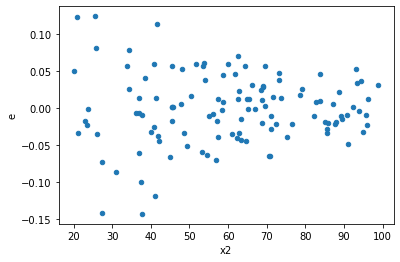

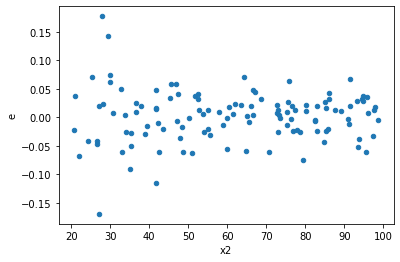

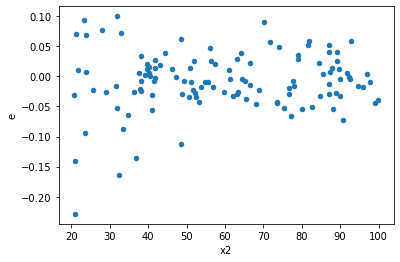

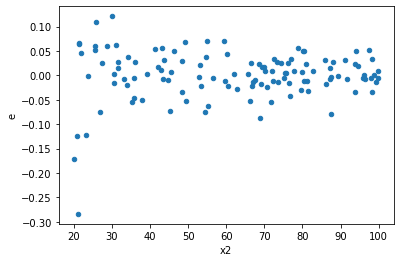

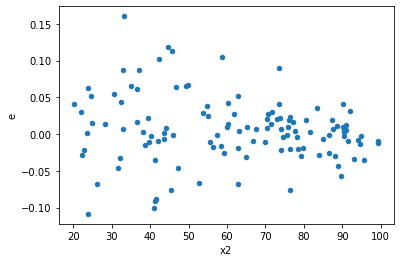

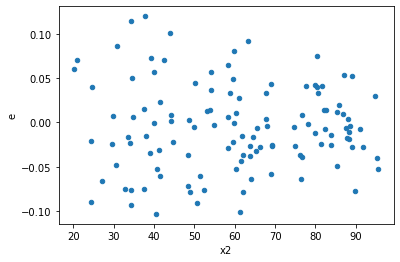

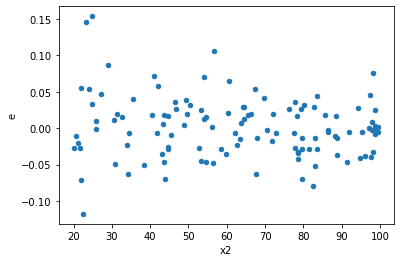

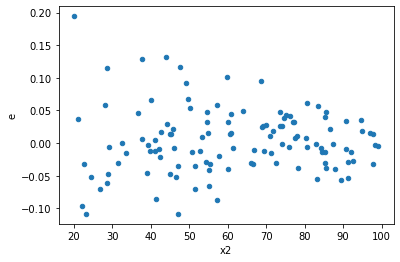

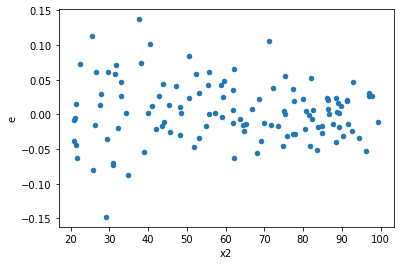

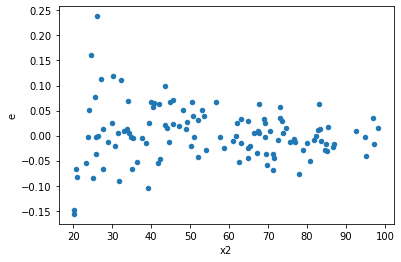

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,65.0,51.0,0.08859466561147536,0.1620800656543265,0.0013629948555611594,0.0031780405030260098,2.3316599399178046,0.0020687843934559247,0.998965607803272,0.0010343921967279623,Reject001=0 : Heteroscedasticity
3.0,54.0,62.0,0.05828599513793266,0.24312820953013375,0.0010793702803320862,0.003921422734356996,3.6330653213376465,1.6111455038991807e-06,0.999999194427248,8.055727519495903e-07,Reject001=0 : Heteroscedasticity
7.0,61.0,55.0,0.0901277933174216,0.19264894978924751,0.0014775048084823214,0.0035027081779863186,2.370691559091619,0.001409686002134647,0.9992951569989327,0.0007048430010673234,Reject001=0 : Heteroscedasticity
9.0,64.0,52.0,0.08490839494227734,0.25658425486808323,0.0013266936709730834,0.004934312593616985,3.719255395254761,2.7726293678753677e-06,0.9999986136853161,1.3863146839376839e-06,Reject001=0 : Heteroscedasticity
11.0,51.0,65.0,0.0632144443359973,0.11825262495278265,0.0012394989085489666,0.001819271153119733,1.4677472812376118,0.14382889165291668,0.9280855541735417,0.07191444582645834,Reject001=1 : Homoscedasticity
14.0,61.0,55.0,0.08122637342382763,0.12300693497898964,0.0013315798921938956,0.0022364897268907207,1.6795760735061163,0.05243254483524562,0.9737837275823772,0.02621627241762281,Reject001=1 : Homoscedasticity
22.0,60.0,56.0,0.07529711397379883,0.14422167280379294,0.0012549518995633138,0.0025753870143534452,2.0521798606381676,0.007319108188944101,0.996340445905528,0.0036595540944720506,Reject001=0 : Heteroscedasticity
24.0,65.0,51.0,0.07645338324292236,0.09656556431944513,0.0011762058960449594,0.001893442437636179,1.6097882556132024,0.07902757853040199,0.960486210734799,0.039513789265200994,Reject001=1 : Homoscedasticity
27.0,76.0,40.0,0.17426830614295785,0.15142900234179138,0.0022930040281968138,0.0037857250585447847,1.650989275200631,0.08454910647340097,0.9577254467632995,0.042274553236700485,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,65.0,51.0,0.08859466561147536,0.1620800656543265,0.0013629948555611594,0.0031780405030260098,2.3316599399178046,0.0020687843934559247,Reject001=0 : Heteroscedasticity
1.0,65.0,51.0,0.16083741165289064,0.06332201464181655,0.002474421717736779,0.0012416081302316971,0.5017770905144373,0.008879732676673788,Reject001=0 : Heteroscedasticity
2.0,66.0,50.0,0.2230694823372544,0.05934933659698906,0.0033798406414735516,0.0011869867319397813,0.3511960645050637,7.880527467039152e-05,Reject001=0 : Heteroscedasticity
3.0,54.0,62.0,0.05828599513793266,0.24312820953013375,0.0010793702803320862,0.003921422734356996,3.6330653213376465,1.6111455038991807e-06,Reject001=0 : Heteroscedasticity
4.0,58.0,58.0,0.15864189439269025,0.07171745468730592,0.0027352050757360386,0.001236507839436309,0.4520713457302894,0.0029575233384258426,Reject001=0 : Heteroscedasticity
5.0,46.0,70.0,0.13538293452723393,0.13108475605257316,0.0029431072723311723,0.0018726393721796167,0.6362796863657434,0.10387086155751776,Reject001=1 : Homoscedasticity
6.0,70.0,46.0,0.14375483928374966,0.05143232209338536,0.0020536405611964238,0.0011180939585518556,0.5444448165264465,0.02120463340894917,Reject001=1 : Homoscedasticity
7.0,61.0,55.0,0.0901277933174216,0.19264894978924751,0.0014775048084823214,0.0035027081779863186,2.370691559091619,0.001409686002134647,Reject001=0 : Heteroscedasticity
8.0,53.0,63.0,0.1194576438996216,0.10039085706320922,0.0022539178094268227,0.0015935056676699875,0.7069936893906617,0.1961854199299265,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    687
Reject001=1 : Homoscedasticity      313
Name: Result_test, dtype: int64